This notebook is used for exploratory data analysis, make sure you use the cleaned dataset from the "data_cleaning" folder in the repo.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set(rc = {'figure.figsize':(10,6)})

In [68]:
# Used Functions
def add_trace(fig, df, var, row, col, mc ='#3b528b'):

  return fig.add_trace(
      go.Box(y=df[var],
      name=var, marker_color=mc),
      row=row, col=col
  )

In [5]:
df = pd.read_csv('/content/Heart Diseases Clean Grouped Last.csv')
#df_corr = pd.read_csv('/content/Heart Diseases Clean Normal.csv')
display(df.head(3))

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestrol,Fasting Blood Pressure > 120mg/dl,Rest ECG,Maximum Heart Rate,Exercise Induced Angina,Exercise Induced ST Depression,Slope,Number of Major Vessels,Thalassemia,Outcome
0,63.0,Male,Typical Angina,145,233,True,Abnormal,150,No,2.3,Downsloping,0,6,No Heart Disease
1,67.0,Male,Asymptomatic,160,286,False,Abnormal,108,Yes,1.5,Flat,3,3,Heart Disease
2,67.0,Male,Asymptomatic,120,229,False,Abnormal,129,Yes,2.6,Flat,2,7,Heart Disease


In [6]:
df['Number of Major Vessels'] = df['Number of Major Vessels'].astype(str)
df['Fasting Blood Pressure > 120mg/dl'] = df['Fasting Blood Pressure > 120mg/dl'].astype(str)
df['Thalassemia'] = df['Thalassemia'].astype(str)

# Filter Numerical and Categorical columns
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes(['object'])

print("The categorical columns are: \n", df_cat.columns, '\n')
print("The numerical columns are: \n", df_num.columns)

The categorical columns are: 
 Index(['Sex', 'Chest Pain Type', 'Fasting Blood Pressure > 120mg/dl',
       'Rest ECG', 'Exercise Induced Angina', 'Slope',
       'Number of Major Vessels', 'Thalassemia', 'Outcome'],
      dtype='object') 

The numerical columns are: 
 Index(['Age', 'Resting Blood Pressure', 'Cholestrol', 'Maximum Heart Rate',
       'Exercise Induced ST Depression'],
      dtype='object')


In [18]:
# Statistical Exploration
df_num.describe()

,Age,Resting Blood Pressure,Cholestrol,Maximum Heart Rate,Exercise Induced ST Depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [70]:
# Visual Statistical Exploration using Boxplot
vars = df_num.columns
                    
fig = make_subplots(rows=3, cols=2, 
                     subplot_titles=(vars))

add_trace(fig, df, vars[0], 1, 1)
add_trace(fig, df, vars[1], 1, 2)
add_trace(fig, df, vars[2], 2, 1)
add_trace(fig, df, vars[3], 2, 2)
add_trace(fig, df, vars[4], 3, 1)

fig.update_layout(height=700, width=900, title = "Spread of Numerical Data in the Heart Disease Dataset")

##Heat Map and Pair Grid

###Pearson correlation

Both pearson and spearman correlations are similar, so we can consider the correlation between the numerical and rank variables viable.

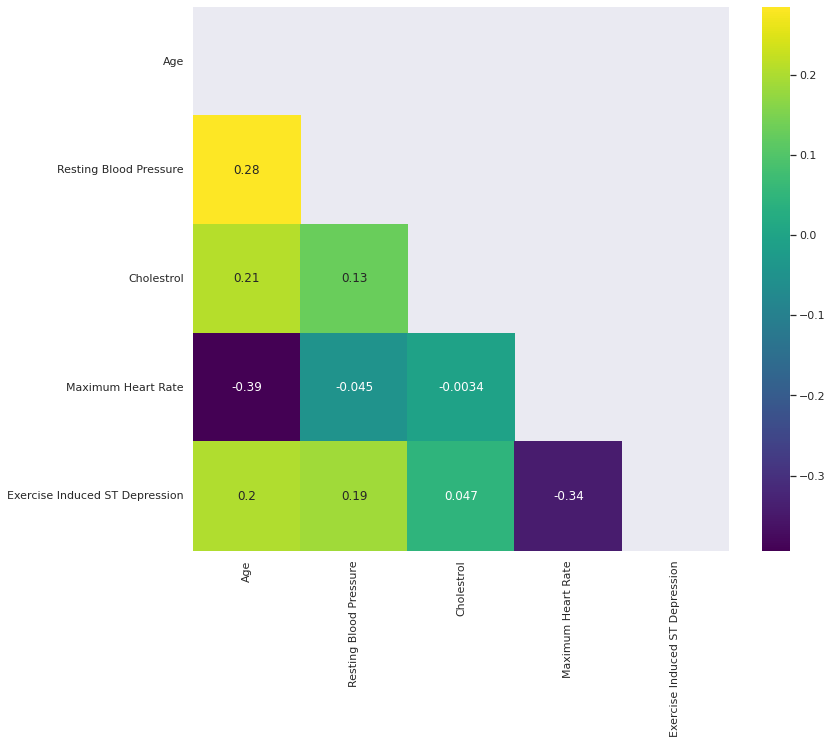

In [9]:
plt.figure(figsize = (12,10))
corr = df_num.corr()
# Using only the lower half of the heatmap to avoid redundancy
matrix = np.triu(corr)
sns.heatmap(corr, annot = True, cmap = 'viridis', mask = matrix)

In [10]:
c = df.loc[:, df.columns != 'outcome'].corr()
s = c.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort"))
display(so)

0
Age                            Maximum Heart Rate             -0.393806
Maximum Heart Rate             Age                            -0.393806
                               Exercise Induced ST Depression -0.343085
Exercise Induced ST Depression Maximum Heart Rate             -0.343085
Maximum Heart Rate             Resting Blood Pressure         -0.045351
Resting Blood Pressure         Maximum Heart Rate             -0.045351
Maximum Heart Rate             Cholestrol                     -0.003432
Cholestrol                     Maximum Heart Rate             -0.003432
Exercise Induced ST Depression Cholestrol                      0.046564
Cholestrol                     Exercise Induced ST Depression  0.046564
Resting Blood Pressure         Cholestrol                      0.130120
Cholestrol                     Resting Blood Pressure          0.130120
Exercise Induced ST Depression Resting Blood Pressure          0.189171
Resting Blood Pressure         Exercise Induced ST Depression  0.189171
Exercise Induced ST Depression Age                             0.203805
Age                            Exercise Induced ST Depression  0.203805
Cholestrol                     Age                             0.208950
Age                            Cholestrol                      0.208950
                               Resting Blood Pressure          0.284946
Resting Blood Pressure         Age                             0.284946
Age                            Age                             1.000000
Cholestrol                     Cholestrol                      1.000000
Resting Blood Pressure         Resting Blood Pressure          1.000000
Maximum Heart Rate             Maximum Heart Rate              1.000000
Exercise Induced ST Depression Exercise Induced ST Depression  1.000000

###Spearman correlation

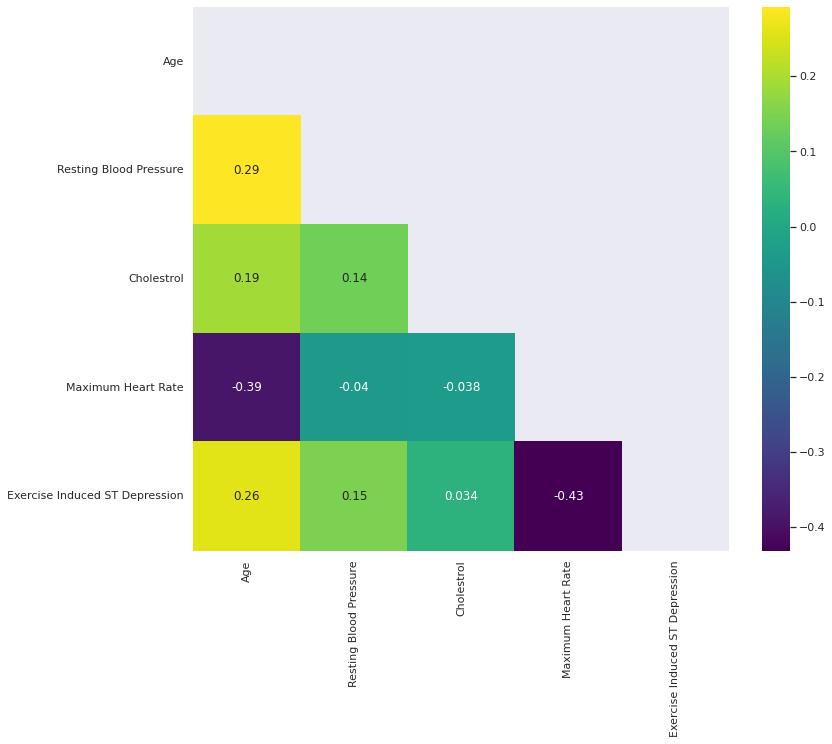

In [11]:
plt.figure(figsize = (12,10))
corr = df_num.corr(method = 'spearman')
matrix = np.triu(corr)
sns.heatmap(corr, annot = True, cmap = 'viridis', mask = matrix)

In [33]:
c = df.corr(method = 'spearman')
s = c.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort"))
display(so)

0
Maximum Heart Rate             Exercise Induced ST Depression -0.431510
Exercise Induced ST Depression Maximum Heart Rate             -0.431510
Age                            Maximum Heart Rate             -0.391633
Maximum Heart Rate             Age                            -0.391633
                               Resting Blood Pressure         -0.040401
Resting Blood Pressure         Maximum Heart Rate             -0.040401
Maximum Heart Rate             Cholestrol                     -0.038301
Cholestrol                     Maximum Heart Rate             -0.038301
Exercise Induced ST Depression Cholestrol                      0.034359
Cholestrol                     Exercise Induced ST Depression  0.034359
Resting Blood Pressure         Cholestrol                      0.135837
Cholestrol                     Resting Blood Pressure          0.135837
Exercise Induced ST Depression Resting Blood Pressure          0.150192
Resting Blood Pressure         Exercise Induced ST Depression  0.150192
Cholestrol                     Age                             0.191253
Age                            Cholestrol                      0.191253
Exercise Induced ST Depression Age                             0.259895
Age                            Exercise Induced ST Depression  0.259895
                               Resting Blood Pressure          0.292183
Resting Blood Pressure         Age                             0.292183
Age                            Age                             1.000000
Cholestrol                     Cholestrol                      1.000000
Resting Blood Pressure         Resting Blood Pressure          1.000000
Maximum Heart Rate             Maximum Heart Rate              1.000000
Exercise Induced ST Depression Exercise Induced ST Depression  1.000000

We should observe the relationship between the outcome and other variables directly (categorical vs categorical and numerical vs numerical), after assessing other relationships.


* slope	outcome	0.40030234220771915
* exang	outcome	0.43525477533153456
* oldpeak	outcome	0.46303189285050217
* cp	outcome	0.4869334788835544
* ca	outcome	0.5309391744043568
* thal	outcome	0.53489118339737

##Pairplot

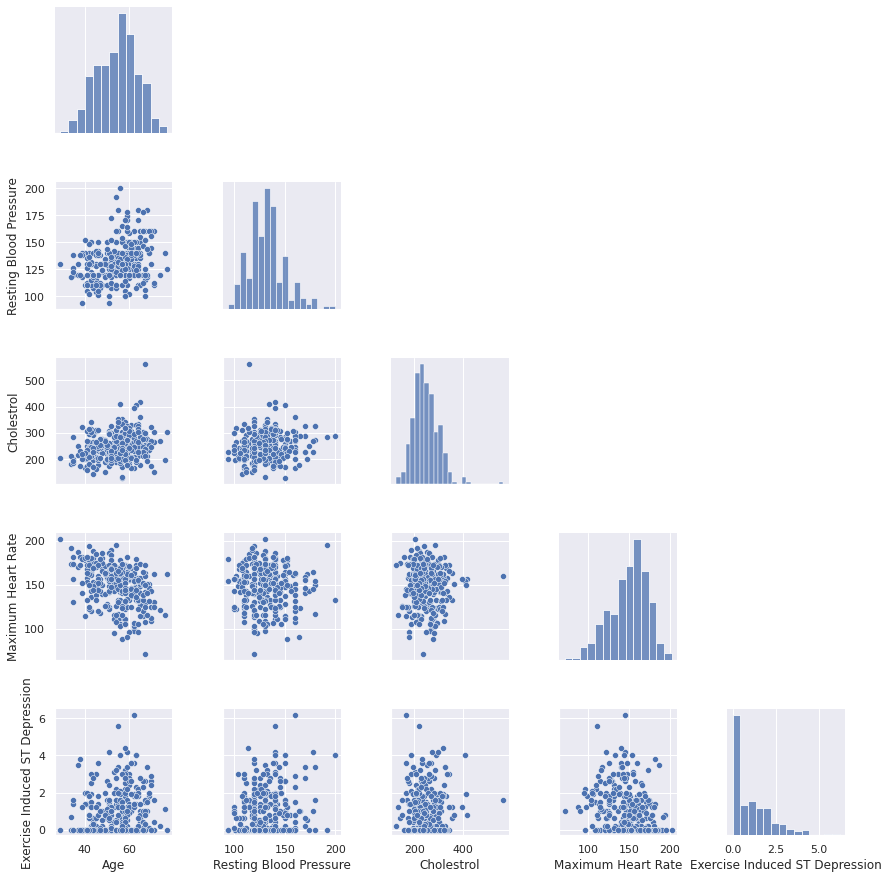

In [52]:
pair_grid = df[['Age', 'Resting Blood Pressure', 'Cholestrol', 'Maximum Heart Rate',
       'Exercise Induced ST Depression']]

g = sns.PairGrid(pair_grid, diag_sharey=False, corner=True)
g.map_offdiag(sns.scatterplot, palette = 'viridis');
g.map_diag(sns.histplot);

## Numerical Variables Exploration

###Age vs other variables

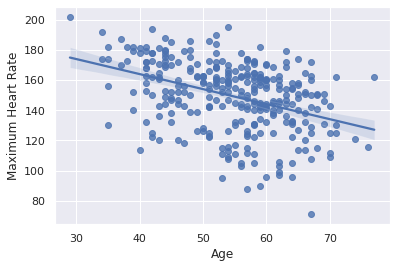

In [ ]:
sns.regplot(data = df, x = 'Age', y = 'Maximum Heart Rate')

We can observe through the graph that there is a relationship between thalack and age, where as the age increases thalack decreases (maximum heart rate achieved). We should also assess the impact of the maximum heart rate achieved on the outcome.

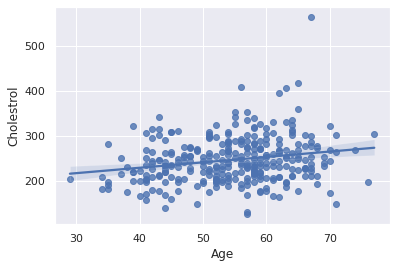

In [ ]:
sns.regplot(data = df, x = 'Age', y = 'Cholestrol')

We can observe a mild positive correlation between the age and cholesterol levels, where as the age increases the cholesterol level slightly increases, we should also observe the impact of cholesterol levels on the outcome.

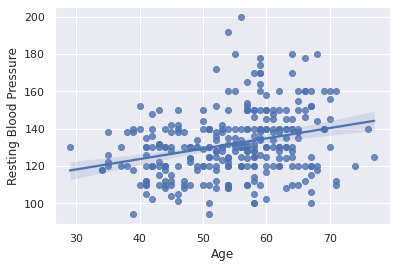

In [ ]:
sns.regplot(data = df, x = 'Age', y = 'Resting Blood Pressure')

We can observe that there is a small correlation between the age and the resting blood pressure, which is also obvious. We should assess the impact of resting blood pressure on the outcome.

##Correlation between outcome and other variables

###Thalassemia and outcome

Since thalassemia and outcome are correlated (0.54), we should investigate the impact of thalassemia on the outcome

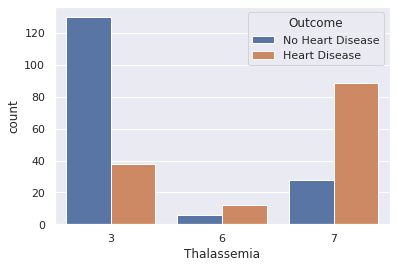

In [ ]:
sns.countplot(data = df, x = 'Thalassemia', hue = 'Outcome')

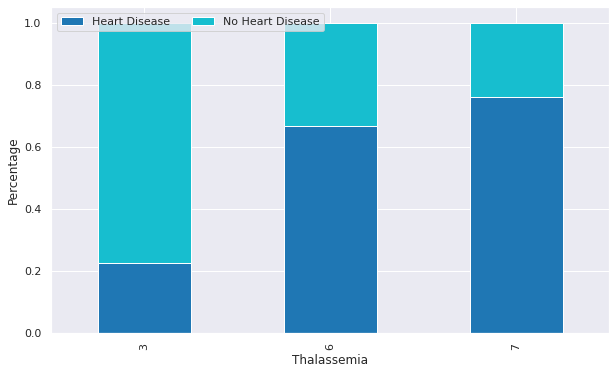

Outcome,Heart Disease,No Heart Disease
Thalassemia,,
3,0.226190,0.773810
6,0.666667,0.333333
7,0.760684,0.239316


In [ ]:
cross_tab_prop = pd.crosstab(index=df['Thalassemia'],
                             columns=df['Outcome'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Thalassemia")
plt.ylabel("Percentage")

cross_tab = pd.crosstab(index=df['Thalassemia'],
                        columns=df['Outcome'])
plt.show()
display(cross_tab_prop)

We can see that most of the people with 'reversable defect' thalassemia have a heart disease (76%), on the other hand most people with 'normal' thalassemia do not have a heart disease (77%). Therefore, we can conclude that 'reversable defect thalassemia' has a high impact on heart diseases and should be factor to consider.

As for 'fixed defect' thalassemia, the percentage bar plot shows that it has a high impact, however the sample size of the data can be considered insufficient compared to 'normal' and 'reversable defect' thalassemia.

Ask client about the impact of thalassemia on heart diseases, in addition to the meaning of reversable defect and fixed defect.

## Categorical Variables Exploration

### Sex and Heart Disease

In [56]:
# (df_cat['Sex'].value_counts() / len(df)) * 100
px.histogram(df, x="Sex", color="Outcome", barmode = 'group', color_discrete_map = {'Heart Disease':'#5ec962', 'No Heart Disease':'#3b528b'})

### Chest Pain and Heart Disease

In [57]:
px.histogram(df, x='Chest Pain Type', color='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#5ec962', 'No Heart Disease':'#3b528b'})

### Rest ECG and Heart Disease

In [58]:
px.histogram(df,x='Rest ECG', color ='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#5ec962', 'No Heart Disease':'#3b528b'})

### Slope and Heart Disease

In [59]:
px.histogram(df, x='Slope', color='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#5ec962', 'No Heart Disease':'#3b528b'})

### Fasting Blood Pressure and Heart Disease

In [60]:
px.histogram(df, x='Fasting Blood Pressure > 120mg/dl', color='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#5ec962', 'No Heart Disease':'#3b528b'})

### Exercise Induced Angina and Heart Disease

In [62]:
px.histogram(df, x='Exercise Induced Angina', color='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#5ec962', 'No Heart Disease':'#3b528b'})

### Number of Major Vessels and Heart Disease

In [63]:
px.histogram(df, x='Number of Major Vessels', color = 'Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#5ec962', 'No Heart Disease':'#3b528b'})

## Numerical and Categorical

#### Exploring Numerical Variables with the Outcome

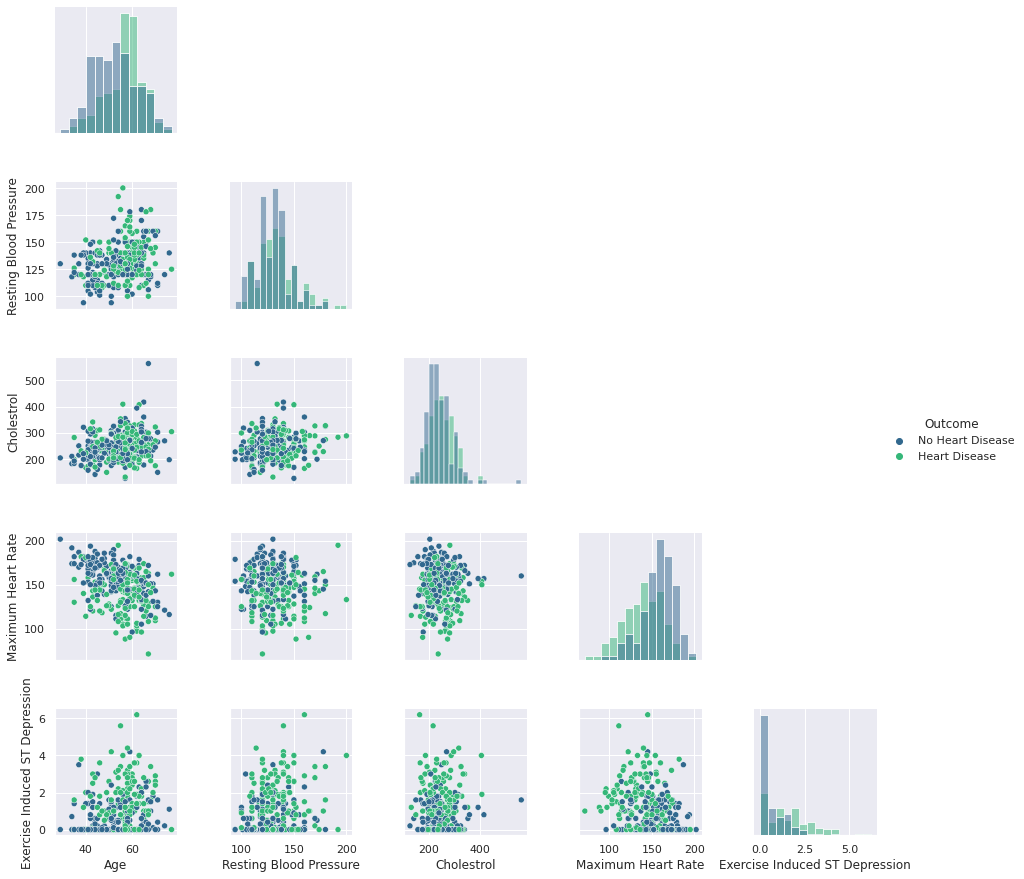

In [51]:
pair_grid = df[['Age', 'Resting Blood Pressure', 'Cholestrol',
       'Maximum Heart Rate', 'Exercise Induced ST Depression', 'Outcome']]

g = sns.PairGrid(pair_grid, hue = 'Outcome', diag_sharey=False, corner=True)
g.map_offdiag(sns.scatterplot, palette = 'viridis');
g.map_diag(sns.histplot, palette = 'viridis');
g.add_legend();